# Objectives 

1. What are Primary Keys (PK) in a database ? 
2. What are Foreign Keys (FK) in a database ?
3. Inner Join statements
4. Right/LEFT Join statements
5. Outer Join statements

# Warm up

- create a new database (if have not already) for the northwind data
- create a new table customers and import the data in the customers.csv file to populate it
- create a new table orders and import the data in the orders.csv file to populate it
- using psql or pgadmin, check the data in the tables

## 1. What are Primary Keys (PKs) ?

- A PK is a column or a set of columns in a table whose values uniquely identify a row in the table
- Definition of a PK in a table is mandatory
- Only one row is allowed with a given PK value in a table
- A table has just one PK
- No value within the PK columns is NULL

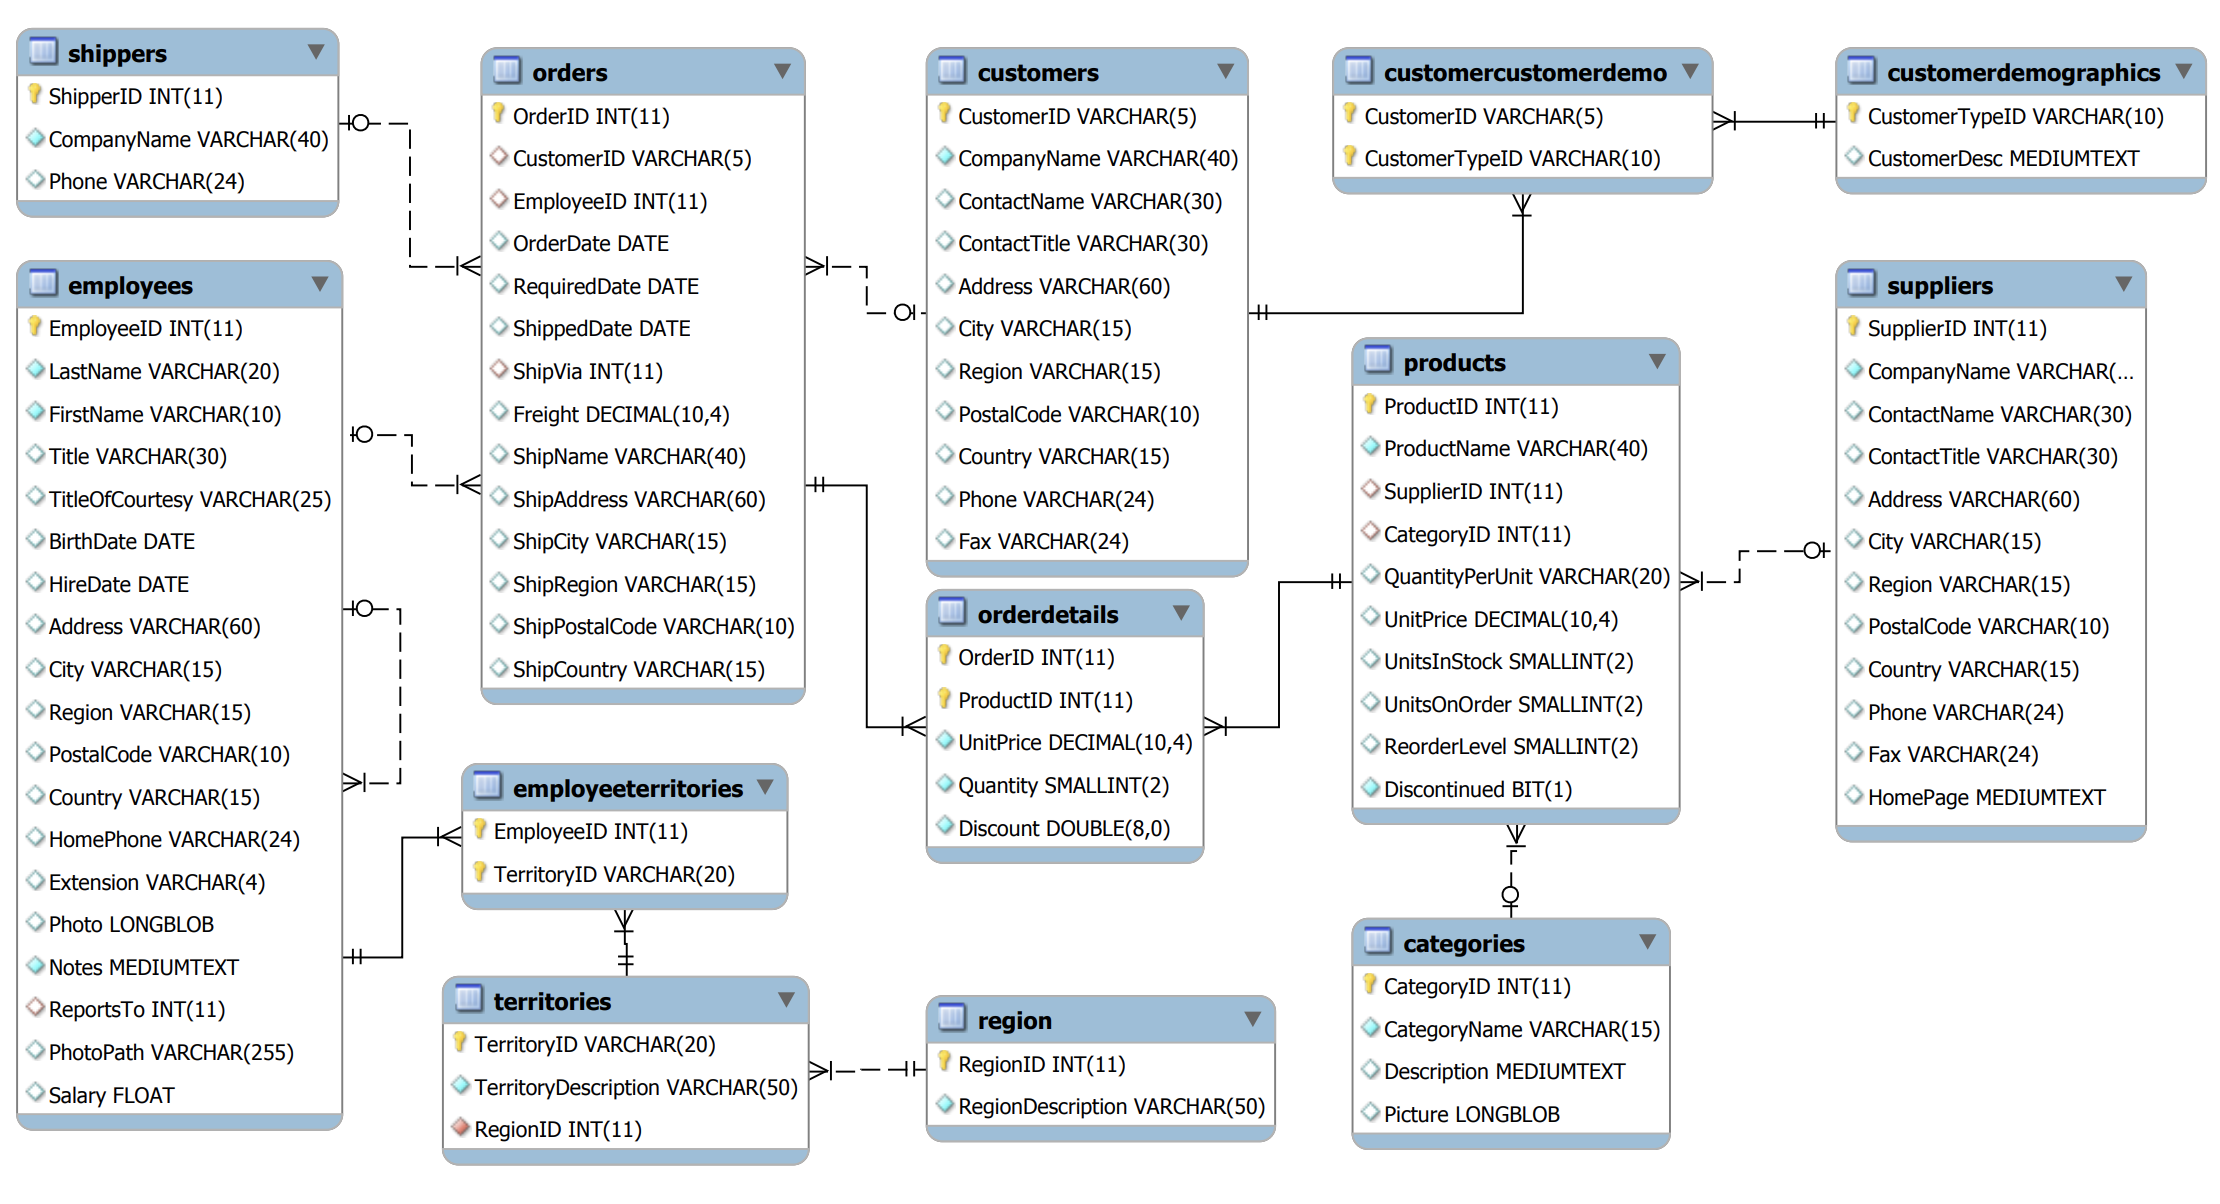

[source](https://www.trek10.com/blog/dynamodb-single-table-relational-modeling)

## 2. What are Foreign Keys (FKs) ?

- A foreign key is a set of one or more columns in a table that refers to the PK in another table
- Defining FKs within a table is optional
- A table can have multiple FKs
- FKs can contain duplicate values
- It is OK for FKs to contain NULL values

Some database management systems allow setting up foreign key constraints, which are used to enforce referential integrity. For example:

- They bar you from changing the FK value to one which doesn’t exist as a value in the related table’s PK
- They stop you from deleting a row from the PK table. This stops you from creating orphan records
- They stop you from adding a FK value that doesn’t exist in the PK

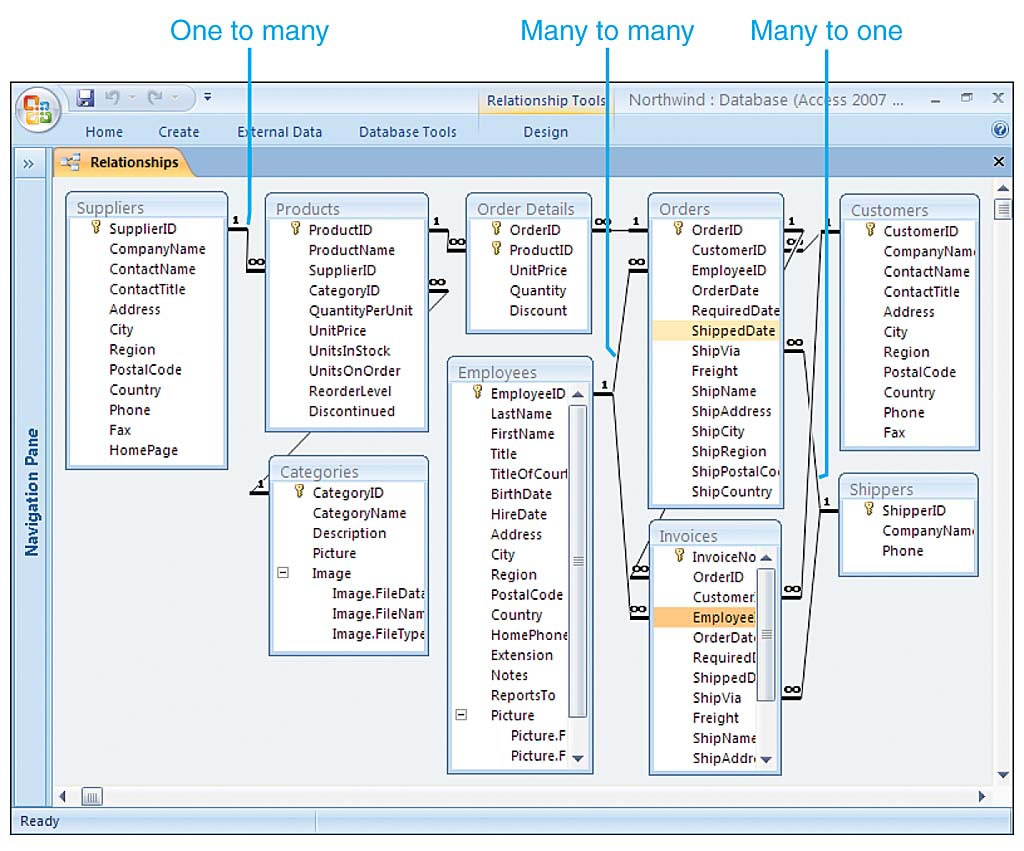

[source](https://www.databasejournal.com/features/msaccess/article.php/10895_3684441_2/Chapter-4-Exploring-Relational-Database-Theory-and-Practice.html)

# SQL Joins

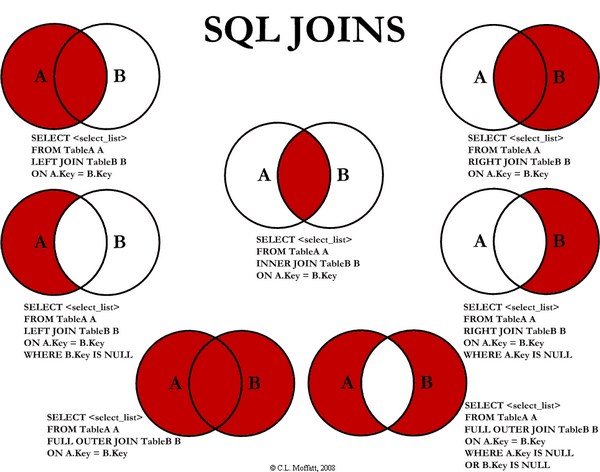

## 3. Inner Join statements

**template for an Inner Join statement**

  **SELECT** columns, aggregate(column) <br>
   FROM table_or_subquery  <br>
   **(INNER) JOIN** other_table **ON** condition  <br>
   **WHERE** condition  <br>
   **GROUP** BY columns  <br>
   **HAVING** condition_after_aggregation  <br>
   **ORDER BY** column ASC|DESC  <br>
   **LIMIT** number;  <br>

### Q1: What is the average weight of all the orders, delivered to each country?

### A1:

SELECT c.country, AVG(o.freight) AS weight <br>
FROM orders AS o <br>
JOIN customers AS c <br>
ON o.customerid = c.customerid <br>
GROUP BY c.country <br>
ORDER BY AVG(o.freight); <br>

### Q2: What is the total revenue delivered to each country?
i.e. total money made from all orders to each country

### A2:

SELECT SUM(od.unitprice * od.quantity * (1 - od.discount)) AS revenue, <br>
       c.country <br>
FROM order_details AS od <br>
JOIN orders AS o ON od.orderid = o.orderid <br>
JOIN customers AS c ON o.customerid = c.customerid <br>
GROUP BY c.country <br>
ORDER BY revenue DESC; <br>

## 4. RIGHT/LEFT Join Statements

### Q3: which of our customers never made any orders?

### A3:

SELECT companyname, contactname, country  <br>
FROM orders AS o  <br>
RIGHT JOIN customers AS c <br>
ON o.customerid = c.customerid <br>
WHERE orderid IS NULL; <br>

### Q4: Display order transactions for all customers

### A4: 

#### step1:

SELECT c.customerid, c.companyname, o.orderid, o.orderdate, <br>
FROM customers AS c <br>
LEFT JOIN orders AS o ON c.customerid = o.customerid <br>
ORDER BY c.customerid; <br>

#### step 2:

SELECT c.customerid, c.companyname, o.orderid, o.orderdate, od.productid, od.unitprice, od.quantity, od.discount <br>
FROM customers AS c <br>
LEFT JOIN orders AS o ON c.customerid = o.customerid <br>
LEFT JOIN order_details AS od ON o.orderid = od.orderid <br>
ORDER BY c.customerid, o.orderid; <br>

#### Check

SELECT c.customerid, c.companyname, o.orderid, o.orderdate, od.productid, od.unitprice, od.quantity, od.discount <br>
FROM customers AS c <br>
LEFT JOIN orders AS o ON c.customerid = o.customerid <br>
LEFT JOIN order_details AS od ON o.orderid = od.orderid <br>
WHERE o.orderid is NULL; <br>

## 5. OUTER Join Statements

### Q5: Are all suppliers in the suppliers table present in the products table and vice versa ?

### A5: